In [20]:
!pip install pytesseract

In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [79]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 14 * 14)
        x = F.relu(self.fc1(x))

        return self.fc2(x)

In [80]:
model = CNN()

In [81]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [82]:
criterion = nn.CrossEntropyLoss()

In [83]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307), (0.3081))])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [84]:
from torchvision import datasets, transforms

In [85]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [86]:
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch: {epoch} Loss: {loss.item():4f}")


In [87]:
for epoch in range(1, 6):
    train(model, train_dataloader, optimizer, criterion, epoch)

Epoch: 1 Loss: 2.302555
Epoch: 1 Loss: 0.103370
Epoch: 1 Loss: 0.164277
Epoch: 1 Loss: 0.373488
Epoch: 1 Loss: 0.018569


KeyboardInterrupt: 

In [ ]:
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            print(output.shape)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)

        acc = 100 * correct / total 
        print(f"Test accuracy: {acc: 2f}%")

In [88]:
test(model, test_dataloader)

torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
torch.Size([1000, 10])
Test accuracy:  98.040000%


In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [2]:
reader = easyocr.Reader(['ru'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
image_path = '-404731715_04.png'
image = cv2.imread(image_path)

In [4]:
results = reader.readtext(image)

C:\Users\Дмитрий\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [5]:
for (bbox, text, prob) in results:
    print(f"Текст: {text}, Точность: {prob:.2f}")

    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

Текст: ~1шъъяшшд, Точность: 0.01
Текст: Цанныи Оанк использовать тОько _оСЛс залоинсния ~0бих листоь осноьныо, Точность: 0.24
Текст: опцщ  чшът_., Точность: 0.01
Текст: #о ^ , Точность: 0.41
Текст: ?ж8, Точность: 0.41
Текст: ущ, Точность: 0.05
Текст: ЭАълс, Точность: 0.13
Текст: уие {Чсли% хя, Точность: 0.06
Текст: 4{м м@&э  &, Точность: 0.05
Текст: 4(, Точность: 0.61
Текст: [м&%, Точность: 0.08
Текст: ~"9 &%<, Точность: 0.24
Текст: ъ/, Точность: 0.46
Текст: ~@ &, Точность: 0.33
Текст: ~д {, Точность: 0.24


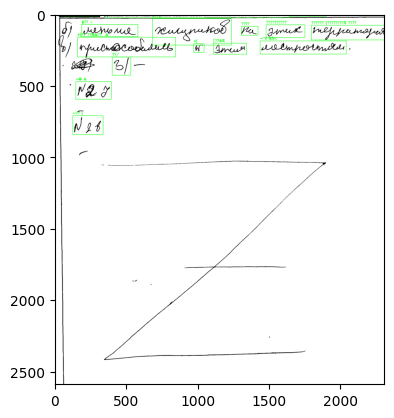

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [21]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
image = cv2.imread('-404731715_03.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

text = pytesseract.image_to_string(image_rgb, lang='rus')
print("Распознанный текст")
print(text)

data = pytesseract.image_to_data(image_rgb, output_type=pytesseract.Output.DICT, lang='rus')

Распознанный текст
ила

аа
р

06) 4  Ибие с. Чао бил вы,
Ием оо ‚и ки. ЛИТ 4



In [22]:
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 60:
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_rgb, data['text'][i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

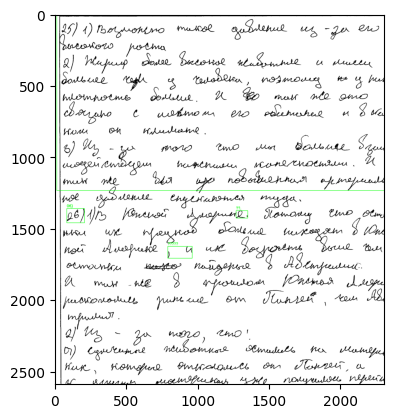

In [23]:
plt.imshow(image_rgb)
plt.show()